In [2]:
import pandas as pd

df = pd.read_csv('train_all.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 76 columns):
record              1500000 non-null int64
channelIp10s        1500000 non-null int64
channelIp3s         1500000 non-null int64
channelApp10s       1500000 non-null int64
channelApp3s        1500000 non-null int64
channelDevice10s    1500000 non-null int64
channelDevice3s     1500000 non-null int64
channelOs10s        1500000 non-null int64
channelOs3s         1500000 non-null int64
osIp10s             1500000 non-null int64
osIp3s              1500000 non-null int64
osApp10s            1500000 non-null int64
osApp3s             1500000 non-null int64
osDevice10s         1500000 non-null int64
osDevice3s          1500000 non-null int64
osChannel10s        1500000 non-null int64
osChannel3s         1500000 non-null int64
deviceIp1s          1500000 non-null int64
deviceApp1s         1500000 non-null int64
deviceOs1s          1500000 non-null int64
deviceChannel1s     1500000

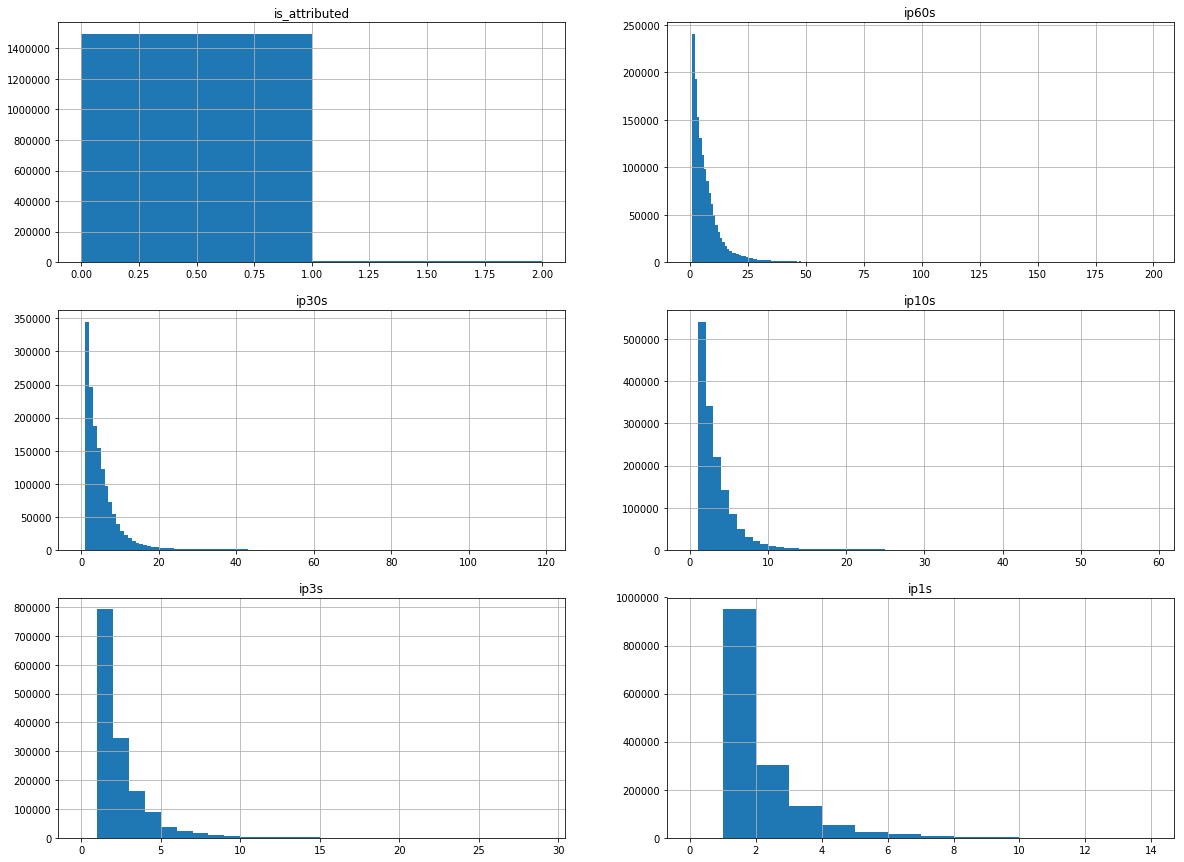

In [18]:
import matplotlib.pyplot as plt


#df.is_attributed.hist()
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.title('is_attributed')
df.is_attributed.hist(bins = [0,1,2])
plt.subplot(3,2,2)
plt.title('ip60s')
df.ip60s.hist(bins = range(200))
plt.subplot(3,2,3)
plt.title('ip30s')
df.ip30s.hist(bins = range(120))
plt.subplot(3,2,4)
plt.title('ip10s')
df.ip10s.hist(bins = range(60))
plt.subplot(3,2,5)
plt.title('ip3s')
df.ip3s.hist(bins = range(30))
plt.subplot(3,2,6)
plt.title('ip1s')
df.ip1s.hist(bins = range(15))
plt.show()

In [25]:
print((df.loc[df.loc[:,'ip30s'] > 10,:].is_attributed == 1).sum(), (df.loc[df.loc[:,'ip30s'] > 10,:].is_attributed == 1).count())

145 154208


In [26]:
print((df.loc[df.loc[:,'ip10s'] > 10,:].is_attributed == 1).sum(), (df.loc[df.loc[:,'ip10s'] > 10,:].is_attributed == 1).count())

47 49849


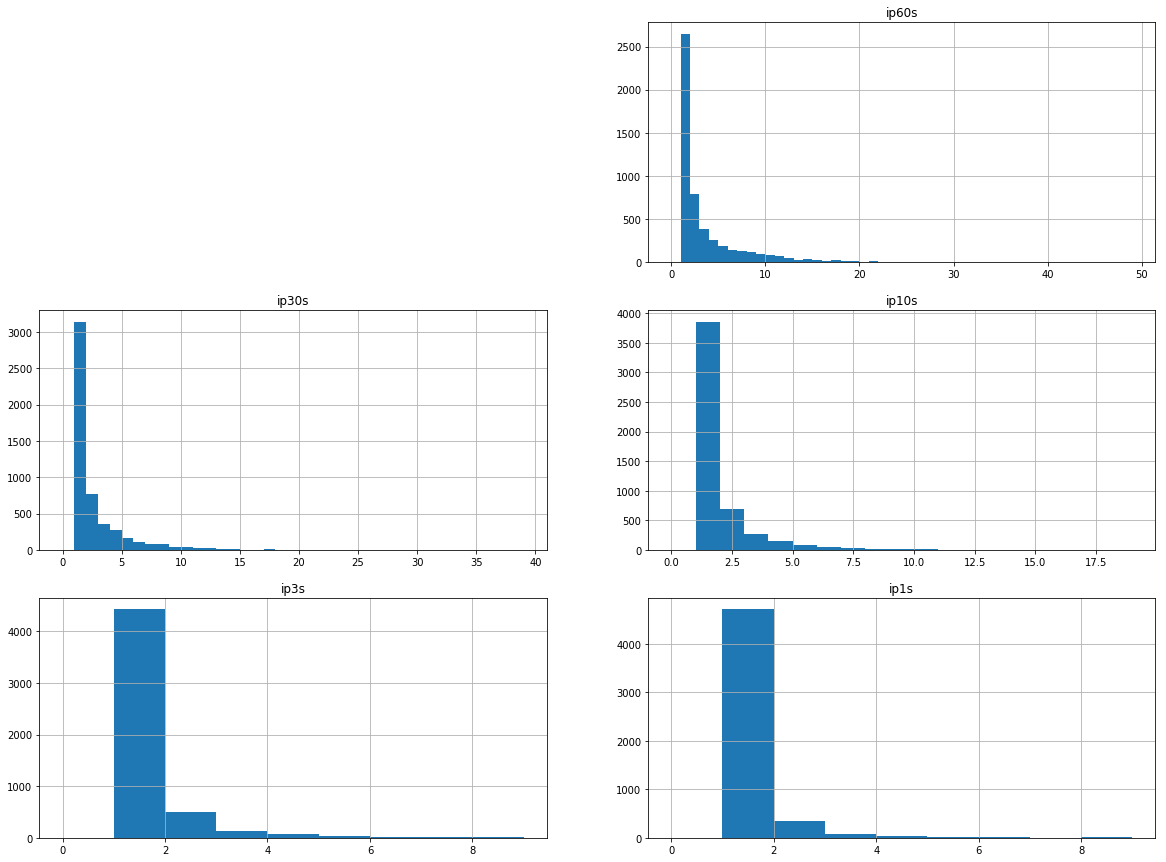

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
good = df.loc[df.loc[:,'is_attributed']==1,:]
good.is_attributed.hist(bins = [0,1,2])
plt.subplot(3,2,2)
plt.title('ip60s')
good.ip60s.hist(bins = range(50))
plt.subplot(3,2,3)
plt.title('ip30s')
good.ip30s.hist(bins = range(40))
plt.subplot(3,2,4)
plt.title('ip10s')
good.ip10s.hist(bins = range(20))
plt.subplot(3,2,5)
plt.title('ip3s')
good.ip3s.hist(bins = range(10))
plt.subplot(3,2,6)
plt.title('ip1s')
good.ip1s.hist(bins = range(10))
plt.show()

## Cross Validation for Support Vector Machine

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#read data by pandas
df_train = pd.read_csv('train_final.csv')
df_test = pd.read_csv('hold_final.csv')

#get y
y_train = df_train.loc[:,'train2$is_attributed'].values

#get X and drop y 
X_train = df_train.drop(columns=['train2$is_attributed'])

#Split train, test
y_test = df_test.loc[:,'validation$is_attributed'].values
X_test = df_test.drop(columns=['validation$is_attributed'])

In [24]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
import numpy as np

clf = svm.SVC(kernel='rbf') #Radial basis function kernel 
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = {'C':C_range, 'gamma':gamma_range}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svm_cv = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=cv)
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine Parameters: {}".format(svm_cv.best_params_)) 
print("Best score is {}".format(svm_cv.best_score_))

Tuned Support Vector Machine Parameters: {'C': 10000000000.0, 'gamma': 1e-09}
Best score is 0.9997158127264599


In [49]:
from sklearn.metrics import confusion_matrix

C = svm_cv.best_params_['C']
gamma = svm_cv.best_params_['gamma']
clf = svm.SVC( kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

0.996332
[[498166      0]
 [  1834      0]]


### ROC Curve and AUC

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = clf.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

#iris_only1 = [1 if iris.target[i]==1 else 0 for i in range(len(iris.target))]
#cv_scores = cross_val_score(clf, iris.data, iris_only1, cv = 5, scoring='roc_auc')
#print(cv_scores)

KeyboardInterrupt: 

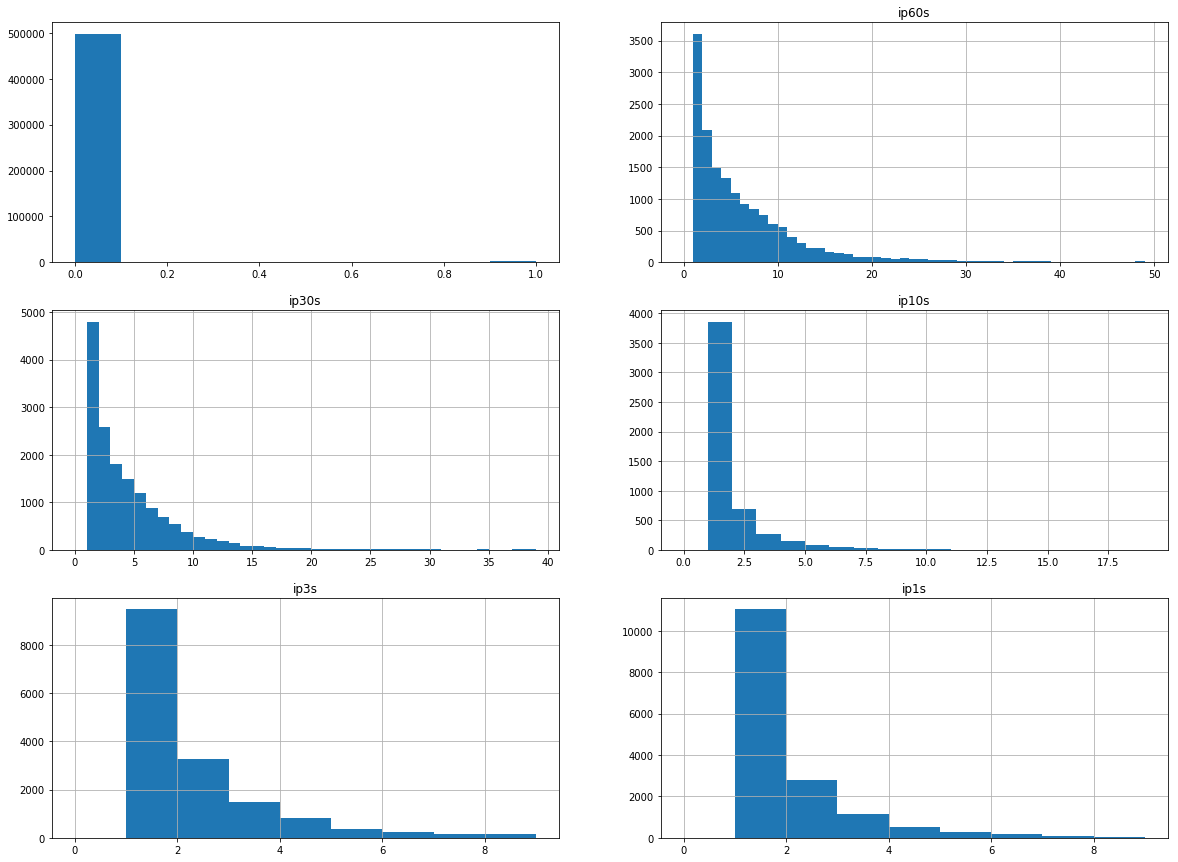

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.hist(y_test)
#df_train.loc[:,'train2$is_attributed'].hist(bins = [0,1,2])
plt.subplot(3,2,2)
plt.title('ip60s')
df_train.ip60s.hist(bins = range(50))
plt.subplot(3,2,3)
plt.title('ip30s')
df_train.ip30s.hist(bins = range(40))
plt.subplot(3,2,4)
plt.title('ip10s')
good.ip10s.hist(bins = range(20))
plt.subplot(3,2,5)
plt.title('ip3s')
df_train.ip3s.hist(bins = range(10))
plt.subplot(3,2,6)
plt.title('ip1s')
df_train.ip1s.hist(bins = range(10))
plt.show()

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16145 entries, 0 to 16144
Data columns (total 32 columns):
Unnamed: 0              16145 non-null int64
osAttrib                16145 non-null float64
channelAttrib           16145 non-null float64
appAttrib               16145 non-null float64
ipApp10s                16145 non-null int64
channelDevice10s        16145 non-null int64
channelApp10s           16145 non-null int64
ipChannel3s             16145 non-null int64
ipApp3s                 16145 non-null int64
appOs10s                16145 non-null int64
ipChannel10s            16145 non-null int64
channelDevice3s         16145 non-null int64
ip10s                   16145 non-null int64
channelOs10s            16145 non-null int64
ip1s                    16145 non-null int64
channelOs3s             16145 non-null int64
appDevice3s             16145 non-null int64
appDevice10s            16145 non-null int64
ip3s                    16145 non-null int64
appChannel3s            16145 